Nama: Agil Rahmat

Nim: 2106037

In [ ]:
import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize

In [ ]:
data = pd.read_csv("test.csv")
print("Describing the data: ",data.describe())
print("Info of the data: ",data.info())

Describing the data:                  id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300000     1.000000   
max    1000.000000    1999.000000     1.000000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep   mobile_wt  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean      4.593000     0.487000    33.652000     0.517500   139.51100  ...   
std       4.463325     0.500081    18.128694     0.280861  

In [ ]:
print("10 first samples of the dataset: ",data.head(10))
print("10 last samples of the dataset: ",data.tail(10))

10 first samples of the dataset:     id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   
5   6           1464     1          2.9         1   5       1          50   
6   7           1718     0          2.4         0   1       0          47   
7   8            833     0          2.4         1   0       0          62   
8   9           1111     1          2.9         1   9       1          25   
9  10           1520     0          0.5         0   1       0          25   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      14

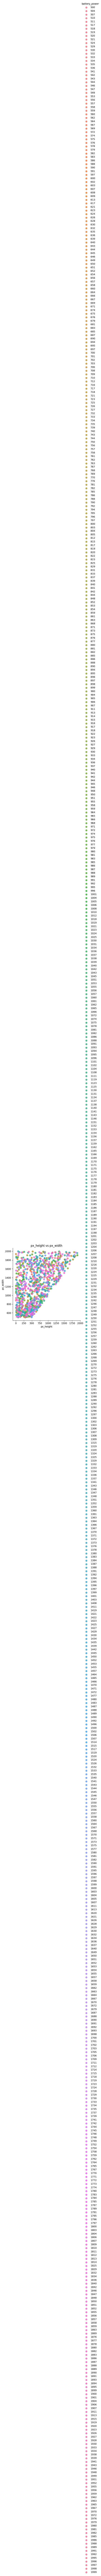

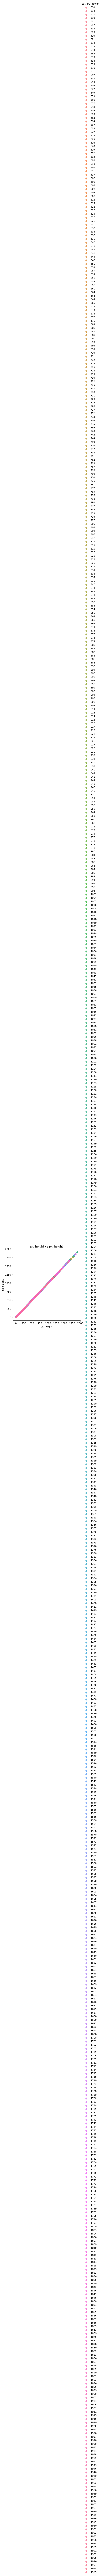

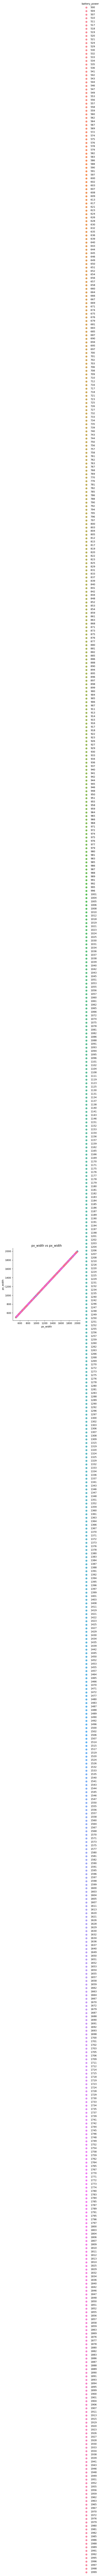

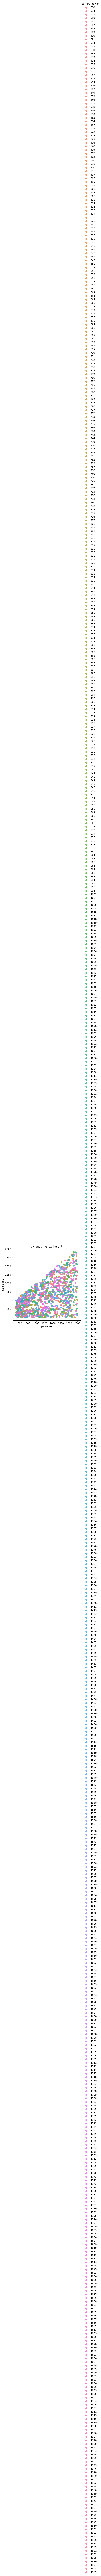

In [ ]:
sns.lmplot(x='px_height',y='px_width', 
           data=data, 
           fit_reg=False, 
           hue="battery_power", 
           scatter_kws={"marker":"D",
                        "s":50})
plt.title('px_height vs px_width')

sns.lmplot(x='px_height', y='px_height', 
           data=data, 
           fit_reg=False, 
           hue="battery_power", 
           scatter_kws={"marker":"D",
                        "s":50})
plt.title('px_height vs px_height')

sns.lmplot(x='px_width', y='px_width', 
           data=data, 
           fit_reg=False, 
           hue="battery_power", 
           scatter_kws={"marker":"D",
                        "s":50})
plt.title('px_width vs px_width')

sns.lmplot(x='px_width', y='px_height', 
           data=data, 
           fit_reg=False, 
           hue="battery_power", 
           scatter_kws={"marker":"D",
                        "s":50})
plt.title('px_width vs px_height')
plt.show()

In [ ]:
print(data["battery_power"].unique())

[1043  841 1807 1546 1434 1464 1718  833 1111 1520 1500 1343  900 1190
  630 1846 1985 1042 1231 1488  968  529 1558  533 1037 1025 1858  980
  644 1024 1981 1380 1557 1201 1074 1175 1280 1715 1165  567 1952  822
  685 1388 1972 1411 1094 1653  916 1712  882  632 1442 1630 1596 1272
 1640 1889 1907  578 1634 1533  660 1847 1206  549 1705 1366 1991 1102
 1452 1810 1166  881 1134 1031 1376 1391  979 1075 1999 1626  942 1182
 1982 1373 1151 1650 1663 1965  679 1465 1809  757 1034 1119  559 1204
 1008 1397  697 1939 1039 1605  769  861  504 1930 1795 1363 1901 1319
  859 1664  955  517 1806 1348 1455 1611 1573  557 1599 1051 1857 1986
  591 1140  923 1582  723 1251  574  948 1571  564 1466  597  895 1535
 1832 1045 1483  976 1840  624 1963 1307 1933 1496 1532 1004  945 1081
 1012 1762  796 1547  988 1180  852  607 1765 1250 1577 1153  651 1186
 1429  556 1735 1859  915  890  758  541  586  762  683 1526 1771  639
 1783 1384 1770 1202  885 1629 1072 1863 1739 1278  562 1249 1811  560
 1773 

In [87]:
data.loc[data["battery_power"]=="1949","battery_power"]=0
data.loc[data["battery_power"]=="1556","battery_power"]=1
data.loc[data["battery_power"]=="1324","battery_power"]=2

print(data.head())

      id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
102  103           1008     0          2.3         1   4       1          15   
149  150           1483     1          0.8         0   4       1          61   
818  819           1247     0          0.8         1  16       0          24   
889  890           1162     1          2.9         1   2       0          57   
20    21            968     0          0.6         0   8       1           7   

     m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
102    0.4         89  ...  19        491       692   450    11     7   
149    0.6        128  ...  10        655       814  3843    11     8   
818    0.8        116  ...  20       1114      1350   522     9     2   
889    0.3        146  ...  19          9       555  1316    10     2   
20     0.7        151  ...  17        504      1930  1357    15     1   

     talk_time  three_g  touch_screen  wifi  
102         18        1           

In [88]:
data=data.iloc[np.random.permutation(len(data))]
print(data.head())

      id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
733  734           1651     0          0.5         0   1       1          57   
587  588            763     0          1.2         1   4       1          59   
826  827           1036     0          1.4         1   6       1          37   
121  122            955     0          0.5         1   0       0          62   
304  305           1210     1          2.3         0   0       0          63   

     m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
733    0.2        193  ...   6        697       924  3421     9     0   
587    0.6        119  ...  17        724       737  2863    18     3   
826    0.5        184  ...  10        416       523  3864     5     2   
121    0.4        151  ...   1        261       538  3758    15     3   
304    0.9        141  ...   4         51      1761   977    14     6   

     talk_time  three_g  touch_screen  wifi  
733         15        1           

In [ ]:
X=data.iloc[:,1:5].values
y=data.iloc[:,5].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X[:3])
print("Examples of y\n",y[:3])

Shape of X (1000, 4)
Shape of y (1000,)
Examples of X
 [[1.008e+03 0.000e+00 2.300e+00 1.000e+00]
 [1.483e+03 1.000e+00 8.000e-01 0.000e+00]
 [1.247e+03 0.000e+00 8.000e-01 1.000e+00]]
Examples of y
 [ 4  4 16]


In [ ]:
X_normalized=normalize(X,axis=0)
print("Examples of X_normalised\n",X_normalized[:3])

Examples of X_normalised
 [[0.02412609 0.         0.04156903 0.04397995]
 [0.03549503 0.04402255 0.01445879 0.        ]
 [0.02984646 0.         0.01445879 0.04397995]]


In [ ]:
'''
80% -- train data
20% -- test data
'''
total_length=len(data)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])
print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])


Length of train set x: 800 y: 800
Length of test set x: 200 y: 200


In [72]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.utils import np_utils

In [86]:
'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''
X_train=np_utils.to_categorical(X_train,num_classes=3)
X_test=np_utils.to_categorical(X_test,num_classes=3)
print("Shape of X_tarin",y_train.shape)
print("Shape of X_test",y_test.shape)

Shape of X_tarin (800, 4, 3, 3, 3, 3)
Shape of X_test (200,)


In [60]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='relu'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [77]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              5000      
                                                                 
 dense_9 (Dense)             (None, 500)               500500    
                                                                 
 dense_10 (Dense)            (None, 300)               150300    
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
                                                                 
 dense_11 (Dense)            (None, 3)                 903       
                                                                 
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________
